In [5]:
import konlpy
from konlpy.tag import Kkma, Okt
from pprint import pprint
okt = Okt()
kkma = Kkma()
pprint(okt.tagset)

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}


In [6]:
from ckonlpy.tag import Twitter  
# Twitter 감성사전이 Okt로 명칭이 바뀐 것. ckonlpy에서는 여전히 'Twitter 명칭 사용'

okt = Twitter()

okt.add_dictionary(['바나나맛우유', '요기요', '빙그레우스', '빙그레', '마시스짐', '마시스', '투게더', '요맘때', 
                    '요맘때슈팅스타', '요거트', '슈퍼콘', '붕어싸만코', '더위사냥', '요플레', '투게더리고리경', '극B',
                    '빙그레나라', '빙그레왕국', '요술단지', '단지', '꽃게랑', '오뚜기', '투게더리고리', '꼬드게랑', '엔초', 
                    '비비빅', '끌레도르', '싸만코', '아카페라', '엑설런트', '메로나', '빙그레우스더마시스짐', '마노플랜', 
                    '빙그레메이커', '비바시티', '쥬시쿨', '밀크타임', '옹떼', '부르쟝', '옹떼메로나부르쟝', '프렌치바닐라', '뚜레쥬르', 
                    '엔초잘팔리리', '캔디바', '스페셜티', '아카페라스페셜티', '빵또아', '존맛', '존잘', '존예', '드립',
                   '인스타그램', '인스타', '리그램', '인친', '피드', '존버', '꼰대', '꾸안꾸', '고퀄', '고퀄리티', '항마력', '자뻑',
                   '심쿵', '킬포', '병맛', '아재', '찰떡'], 'Noun')
okt.add_dictionary(['마싰', '귀염', '뽀짝', '큐티', '핸섬', '프리티', '졸귀탱', '꿀맛', '귀욤', '취저', '졸잼', '스윗', 
                   '빡치', '쩐'], 'Adjective')

C:\Users\kathy\AppData\Roaming\Python\Python37\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [3]:
def get_noun_adj_verb(comment_txt):
    wordlist = []
    if len(comment_txt)>0:
        tw = okt.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun' or j == 'Adjective' or j == 'Verb':
                wordlist.append(i)
    return wordlist

In [4]:
def get_noun_adj(comment_txt):
    wordlist = []
    if len(comment_txt)>0:
        tw = okt.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun' or j == 'Adjective':
                wordlist.append(i)
    return wordlist

## 유튜브 댓글 분석

In [2]:
import pandas as pd

youtube_corpus = pd.read_excel("./youtube_total_comment.xlsx")
youtube_corpus

,video_number,comment,author,date,num_likes
0,1,‘빙그레나라는 빙그레 캐롤이 울리는 날부터_x000D_<br />크리스마스임을 공표...,빙그레TV,2020-12-11T03:26:41Z,839
1,1,ㅏㄴ86666ㅜ<br />3i.ngdc??eq? Vkczzㅏㅓㅏㅓㅐ부9ㅏ8벝니ㅗㅓㄷ...,유민주,2021-01-17T00:13:20Z,0
2,1,ㅏㅓ999,유민주,2021-01-17T00:01:37Z,0
3,1,@놀아서뭐하냐 <b>Xegiral!!</b>,노얼굴유튜브,2021-01-14T11:37:59Z,0
4,1,@노얼굴유튜브 왜 난 개좋은데 맨날 들음 ㅎㅎ,놀아서뭐하냐,2021-01-14T10:07:56Z,0
...,...,...,...,...,...
8089,3,ㅋㅋㅋㅋㅋㅋ빙그레우스가 움직여! 너무 좋아요,아유무,2020-08-18T01:33:11Z,8
8090,3,빙그레우스 ㅋㅋㅋ,이게모노,2020-08-18T01:27:48Z,1
8091,3,본편 넘기대돼욬ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,나문희열리네요순재가들어오죠,2020-08-18T01:24:18Z,124
8092,3,ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이게뭐야,읽어주다,2020-08-18T01:17:12Z,18


In [3]:
youtube_result = pd.DataFrame(youtube_corpus['comment'])
youtube_result = youtube_result.astype(str)
youtube_result

,comment
0,‘빙그레나라는 빙그레 캐롤이 울리는 날부터_x000D_<br />크리스마스임을 공표...
1,ㅏㄴ86666ㅜ<br />3i.ngdc??eq? Vkczzㅏㅓㅏㅓㅐ부9ㅏ8벝니ㅗㅓㄷ...
2,ㅏㅓ999
3,@놀아서뭐하냐 <b>Xegiral!!</b>
4,@노얼굴유튜브 왜 난 개좋은데 맨날 들음 ㅎㅎ
...,...
8089,ㅋㅋㅋㅋㅋㅋ빙그레우스가 움직여! 너무 좋아요
8090,빙그레우스 ㅋㅋㅋ
8091,본편 넘기대돼욬ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
8092,ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이게뭐야


In [7]:
youtube_result['adj_token'] = youtube_result['comment'].apply(lambda x: get_noun_adj(x))

In [8]:
youtube_result['verb_token'] = youtube_result['comment'].apply(lambda x: get_noun_adj_verb(x))

In [9]:
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import numpy as np

font_path = "C:/Users/kathy/AppData/Local/Microsoft/Windows/Fonts/BinggraeⅡ-Bold.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

**명사&형용사**

In [10]:
noun_adj_list = []
for i in range(len(youtube_result)):
    for j in range(len(youtube_result['adj_token'].iloc[i])):
        noun_adj_list.append(youtube_result['adj_token'].iloc[i][j])
        
youtube_count = Counter(noun_adj_list)

In [11]:
yword_count = dict()
# for tag, counts in youtube_count.most_common(500):
for tag, counts in youtube_count.most_common(80):
    if(len(str(tag))>1):
        yword_count[tag] = counts
        # print("%s : %d" % (tag. counts))
yword_count

{'빙그레': 1801,
 '광고': 1465,
 '노래': 959,
 '우유': 709,
 '빙그레우스': 660,
 '메이커': 645,
 '바나나': 641,
 '진짜': 637,
 '보고': 609,
 '업무': 491,
 '목소리': 419,
 '까지': 408,
 '성우': 309,
 '처음': 293,
 '어요': 255,
 '생각': 250,
 '뮤지컬': 235,
 '투게더': 223,
 '다가': 217,
 '계속': 214,
 '웃음': 210,
 '배우': 205,
 '영상': 200,
 '보스': 197,
 '감동': 187,
 '고퀄': 180,
 '세상': 171,
 '어서': 165,
 '정신': 163,
 '사람': 159,
 '면서': 157,
 '캐릭터': 156,
 '이런': 152,
 '진심': 151,
 '스킵': 150,
 '하하': 148,
 '개그': 148,
 '김성철': 147,
 '중독': 146,
 '빙그레메이커': 144,
 '애니': 141,
 '메로나': 140,
 '좋아': 135,
 '웃기': 133,
 '무슨': 130,
 '꽃게랑': 130,
 '농담': 130,
 '여기': 126,
 '번의': 122,
 '부터': 121,
 '정말': 118}

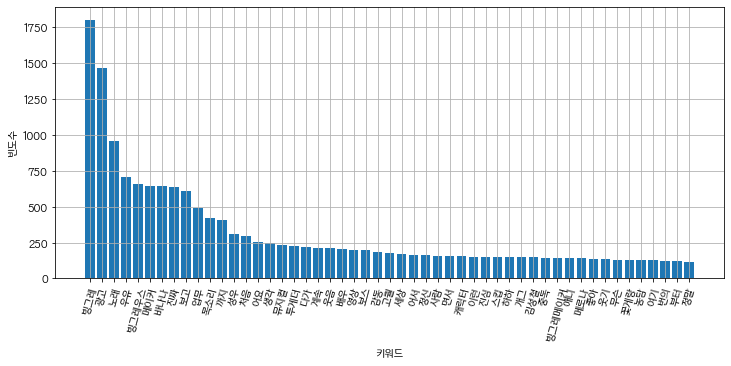

In [12]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(yword_count, key = yword_count.get, reverse = True)
sorted_Values = sorted(yword_count.values(), reverse = True)
plt.bar(range(len(yword_count)), sorted_Values, align='center')
plt.xticks(range(len(yword_count)), list(sorted_Keys), rotation='75')
plt.show()

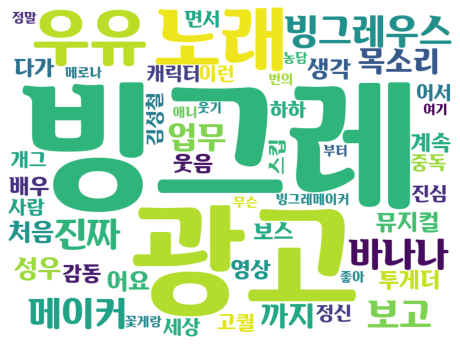

In [13]:
wc = WordCloud(font_path, background_color='white', width = 800, height = 600)
cloud = wc.generate_from_frequencies(yword_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

**명사&형용사&동사**

In [14]:
verb_list = []
for i in range(len(youtube_result)):
    for j in range(len(youtube_result['verb_token'].iloc[i])):
        verb_list.append(youtube_result['verb_token'].iloc[i][j])
        
youtube_count2 = Counter(verb_list)

In [15]:
yword_count2 = dict()
# for tag, counts in youtube_count.most_common(500):
for tag, counts in youtube_count2.most_common(80):
    if(len(str(tag))>1):
        yword_count2[tag] = counts
        # print("%s : %d" % (tag. counts))
yword_count2

{'빙그레': 1801,
 '광고': 1465,
 '노래': 959,
 '우유': 709,
 '빙그레우스': 660,
 '메이커': 645,
 '바나나': 641,
 '진짜': 637,
 '보고': 609,
 '업무': 491,
 '목소리': 419,
 '까지': 408,
 '성우': 309,
 '처음': 293,
 '어요': 255,
 '생각': 250,
 '뮤지컬': 235,
 '투게더': 223,
 '다가': 217,
 '계속': 214,
 '웃음': 210,
 '배우': 205,
 '영상': 200,
 '보스': 197,
 '감동': 187,
 '고퀄': 180,
 '세상': 171,
 '어서': 165,
 '정신': 163,
 '사람': 159,
 '면서': 157,
 '캐릭터': 156,
 '이런': 152,
 '진심': 151,
 '스킵': 150,
 '하는': 149,
 '하하': 148,
 '개그': 148,
 '김성철': 147,
 '중독': 146,
 '빙그레메이커': 144,
 '애니': 141,
 '메로나': 140,
 '좋아': 135,
 '웃기': 133,
 '합니다': 130,
 '무슨': 130,
 '꽃게랑': 130,
 '농담': 130}

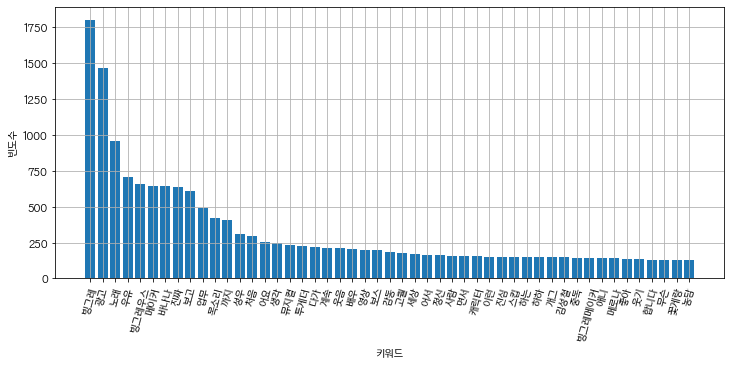

In [16]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(yword_count2, key = yword_count2.get, reverse = True)
sorted_Values = sorted(yword_count2.values(), reverse = True)
plt.bar(range(len(yword_count2)), sorted_Values, align='center')
plt.xticks(range(len(yword_count2)), list(sorted_Keys), rotation='75')
plt.show()

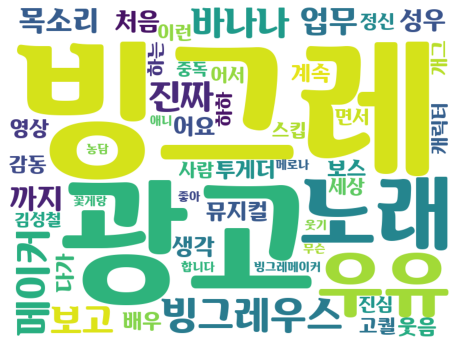

In [17]:
wc = WordCloud(font_path, background_color='white', width = 800, height = 600)
cloud = wc.generate_from_frequencies(yword_count2)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### kkma로 분석하기
**kkma의 경우 분석이 오래 걸리는 것이 가장 큰 단점. 데이터 양이 늘어나자 명사 형태소 분석을 못하고 있음**

# 토픽 모델링: LDA - 댓글

## 1) LDA 토픽 모델의 입력 벡터 생성하기 & 분석

- 글자수가 1인 단어를 토픽모델링에 포함하면, '이', '그', '저' 이런 단어들이 자주 포함됨 => 그래서 글자수 1보다 많은 단어만 포함

In [18]:
import gensim
import gensim.corpora as corpora

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### 형용사&명사&동사의 경우

In [22]:
description_verb_tk = []

for d in youtube_result['comment']:
    description_verb_tk.append(get_noun_adj_verb(d))
print(description_verb_tk)

[['빙그레나라', '빙그레', '캐롤', '울리는', '날', '부터', '크리스마스', '임', '공표', '함', '빙그레우스', '맘대로', '해당', '공표', '따라', '빙그레', '캐롤', '들은', '여러분', '오늘', '부터', '크리스마스', '되었습니다', '귀', '여운', '건', '크게', '보라', '명', '있었으니', '전체', '화면', '즐겨', '주시', '이나', '일찍', '시작', '된', '크리스마스', '만큼', '설레는', '마', '음으로', '더', '웃으시길', '바랍니다', '수고', '많으셨습니다', '빙그레', '올림', '세상', '빙그레', '가득', '해지', '길', '바', '마음', '담아', '빙그레', '크리스마스', '캐롤', '송', '버전', '음원', '여러분', '오픈', '합니다'], ['부', '벝', '닢', '브보'], [], ['놀아서', '뭐'], ['노', '얼굴', '유튜브', '왜', '난', '개', '좋은데', '들음'], ['나', '이', '광고', '처음', '볼때', '게임', '광고인', '줄', '알았나'], ['헐', '대박', '귀여웡'], ['김성철', '배우', '통해', '입덕', '했', '어요', '빙그레'], ['크리스마스', '멀었', '갑자기', '생각', '와', '봤', '습', '미다'], ['굿', '내주', '제발'], ['빙그레', '미쳤눜', '무슨', '캐롤', '귀엽게', '만드냐', '곸'], ['말'], ['꽃게랑', '혼자', '눈', '모양', '다른', '것', '봐', '귀엽다'], ['상', '산타', '없는데', '선물', '주는거', '자신', '엄마', '아빠', '임'], ['듣기', '좋다'], ['종도', '바나나', '우유', '임'], ['빙그레', '왜', '나', '거', '광고', '안', '띄어주냐고', '개', '짜증'], ['노래', '손', '모아', '소원', '발', '어

**토큰 길이가 1보다 큰 것만 추출**

In [23]:
description_verb_tk2 = []

for d in description_verb_tk:
    item = [i for i in d if len(i) > 1]
    description_verb_tk2.append(item)

In [24]:
verb_dictionary = corpora.Dictionary(description_verb_tk2)
print(verb_dictionary[3])

되었습니다


In [25]:
verb_corpus = [verb_dictionary.doc2bow(word) for word in description_verb_tk2]
print(verb_corpus)

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 5), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 1), (38, 4), (39, 1), (40, 1), (41, 1), (42, 1)], [(43, 1)], [], [(44, 1)], [(45, 1), (46, 1), (47, 1), (48, 1)], [(49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(55, 1), (56, 1)], [(14, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(38, 1), (62, 1), (63, 1), (64, 1), (65, 1)], [(66, 1), (67, 1)], [(14, 1), (36, 1), (68, 1), (69, 1), (70, 1), (71, 1)], [], [(72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1)], [(84, 1), (85, 1)], [(86, 1), (87, 1), (88, 1)], [(14, 1), (50, 1), (89, 1), (90, 1)], [(13, 1), (14, 2), (18, 1), (23, 1), (38, 4), (59, 1), (77, 1), (91, 1), (92, 1), (93, 1), (94, 1)

- passes : 패스는 모델 학습시 전체 코퍼스에서 모델을 학습시키는 빈도를 제어한다고 합니다.     
- iteration : 각각 문서에 대해서 루프를 얼마나 돌리는지를 제어한다고 합니다.  
- pass & iteration 은 최대한 많은게 좋다!      
         
출처: https://coredottoday.github.io/2018/09/17/%EB%AA%A8%EB%8D%B8-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%ED%8A%9C%EB%8B%9D/

### passes 값 조정하기 
- perpelxity는 사전적으로는 혼란도 라고 쓰인다고 합니다. 즉 특정 확률 모델이 실제도 관측되는 값을 어마나 잘 예측하는지를 뜻합니다. Perlexity값이 작으면 토픽모델이 문서를 잘 반영된다고 알 수 있습니다. 따라서 작아지는것이 중요합니다.     
- coherence는 주제의 일관성을 측정합니다. 해당 토픽모델이, 모델링이 잘 되었을수록 한 주제 안에는 의미론적으로 유사한 단어가 많이 모여있게 마련

In [26]:
import warnings
import time
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(10):
    
    ntopics, nwords = 5, 15
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(verb_corpus, id2word=verb_dictionary, num_topics=ntopics, iterations=400, passes=p)
    print('epoch',p,time.time() - tic)
    # tfidf, corpus 무슨 차이?
    # lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=200000)

    cm = CoherenceModel(model=lda4, corpus=verb_corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(verb_corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(verb_corpus))

epoch 1 4.431186676025391
Coherence -8.27604483491542
Perplexity:  -8.195433670999131 


epoch 5 14.431418418884277
Coherence -7.437521147130357
Perplexity:  -7.98071831126943 


epoch 10 24.408745527267456
Coherence -8.566835542017914
Perplexity:  -7.925583098089231 


epoch 15 38.45219826698303
Coherence -5.865977451374552
Perplexity:  -7.89328625202859 


epoch 20 39.16731595993042
Coherence -8.188058316180824
Perplexity:  -7.9156721110207116 


epoch 25 66.5351185798645
Coherence -7.767023366616366
Perplexity:  -7.893079747292148 


epoch 30 91.12537837028503
Coherence -7.291532133526002
Perplexity:  -7.89982482865182 


epoch 35 79.90241479873657
Coherence -5.488526897364667
Perplexity:  -7.868076492388036 


epoch 40 95.77092504501343
Coherence -5.550032798142065
Perplexity:  -7.883390487651402 


epoch 45 124.36251854896545
Coherence -8.108325026414793
Perplexity:  -7.877833791281831 




In [27]:
passes = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]

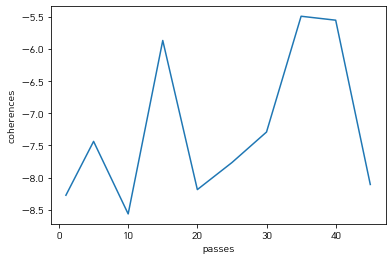

In [28]:
font_path = "C:/Windows/Fonts/HANDotum.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

plt.plot(passes, coherences)
plt.xlabel('passes')
plt.ylabel('coherences')
plt.show()

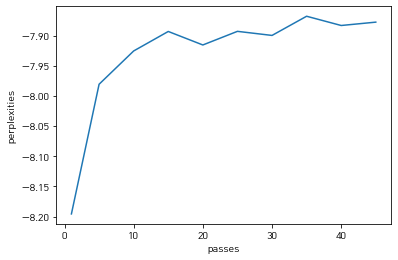

In [29]:
plt.plot(passes, perplexities)
plt.xlabel('passes')
plt.ylabel('perplexities')
plt.show()

**=> passes 값은 40으로 하기**

### topic 값 조정하기

In [30]:
from gensim import corpora, models, similarities

coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(10):
    if i==0:
        ntopics = 1
    else:
        ntopics = i+1
    nwords = 15
    tic = time.time()
    lda4 = models.ldamodel.LdaModel(verb_corpus, id2word=verb_dictionary, num_topics=ntopics, iterations=400, passes=40)
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=verb_corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(verb_corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(verb_corpus))

ntopics 1 31.934619665145874
Coherence -3.236156539013844
Perplexity:  -7.743500636391295 


ntopics 2 90.49605917930603
Coherence -3.379647232158777
Perplexity:  -7.7427949367846685 


ntopics 3 92.49571323394775
Coherence -4.968412254356883
Perplexity:  -7.7832856821345935 


ntopics 4 86.69222664833069
Coherence -5.616330591894118
Perplexity:  -7.8078625464368745 


ntopics 5 92.7181191444397
Coherence -6.968206778279173
Perplexity:  -7.877102116168957 


ntopics 6 90.85110998153687
Coherence -8.495786918668173
Perplexity:  -7.911063659238776 


ntopics 7 106.32078695297241
Coherence -7.846831139156079
Perplexity:  -7.958628689909411 


ntopics 8 104.69413185119629
Coherence -10.07826581983652
Perplexity:  -7.951271996195606 


ntopics 9 59.46800899505615
Coherence -9.523496689686361
Perplexity:  -7.98386691462718 


ntopics 10 97.28000450134277
Coherence -10.062744801777754
Perplexity:  -8.010129020134054 




In [31]:
ntopics = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

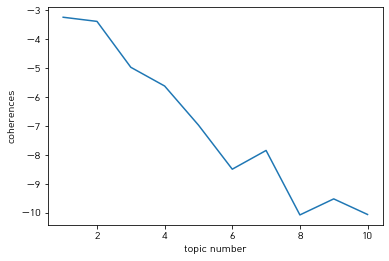

In [32]:
plt.plot(ntopics, coherencesT)
plt.xlabel('topic number')
plt.ylabel('coherences')
plt.show()

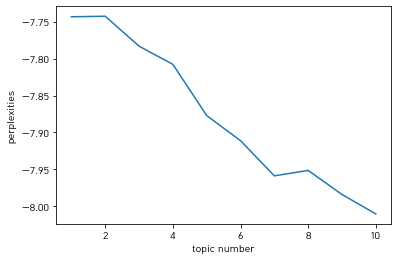

In [33]:
plt.plot(ntopics, perplexitiesT)
plt.xlabel('topic number')
plt.ylabel('perplexities')
plt.show()

In [34]:
k = 3 # 토픽의 개수 설정
verb_lda_model = gensim.models.ldamulticore.LdaMulticore(verb_corpus, iterations = 400, num_topics = k, id2word = verb_dictionary, 
                                                   passes = 40, workers = 10)

print(verb_lda_model.print_topics(num_topics = k, num_words = 15))

[(0, '0.073*"빙그레" + 0.034*"메이커" + 0.020*"업무" + 0.011*"웃음" + 0.010*"빙그레우스" + 0.010*"보고" + 0.009*"세상" + 0.008*"정신" + 0.007*"농담" + 0.007*"웃기" + 0.006*"만드는" + 0.006*"번의" + 0.006*"합니다" + 0.006*"보스" + 0.006*"투게더"'), (1, '0.037*"광고" + 0.016*"빙그레" + 0.015*"진짜" + 0.011*"까지" + 0.010*"보고" + 0.010*"처음" + 0.008*"빙그레우스" + 0.007*"노래" + 0.007*"영상" + 0.006*"어서" + 0.006*"개그" + 0.006*"메로나" + 0.006*"고퀄" + 0.005*"감동" + 0.005*"스킵"'), (2, '0.034*"노래" + 0.032*"우유" + 0.029*"바나나" + 0.026*"광고" + 0.020*"목소리" + 0.014*"성우" + 0.012*"빙그레우스" + 0.011*"뮤지컬" + 0.010*"진짜" + 0.010*"배우" + 0.008*"보고" + 0.007*"김성철" + 0.006*"좋아" + 0.006*"까지" + 0.005*"다가"')]


In [35]:
k = 4 # 토픽의 개수 설정
verb_lda_model2 = gensim.models.ldamulticore.LdaMulticore(verb_corpus, iterations = 400, num_topics = k, id2word = verb_dictionary, 
                                                   passes = 40, workers = 10)

print(verb_lda_model2.print_topics(num_topics = k, num_words = 15))

[(0, '0.088*"빙그레" + 0.038*"메이커" + 0.012*"진짜" + 0.012*"웃음" + 0.012*"빙그레우스" + 0.010*"세상" + 0.009*"광고" + 0.007*"번의" + 0.007*"만드는" + 0.006*"정신" + 0.006*"농담" + 0.006*"정말" + 0.005*"하는" + 0.005*"합니다" + 0.005*"시도"'), (1, '0.045*"노래" + 0.045*"우유" + 0.040*"바나나" + 0.026*"목소리" + 0.013*"진짜" + 0.013*"배우" + 0.013*"빙그레우스" + 0.011*"성우" + 0.010*"빙그레" + 0.009*"김성철" + 0.008*"좋아" + 0.008*"뮤지컬" + 0.007*"좋다" + 0.006*"음원" + 0.006*"어요"'), (2, '0.034*"업무" + 0.019*"보고" + 0.015*"보스" + 0.015*"빙그레우스" + 0.012*"투게더" + 0.011*"성우" + 0.010*"메로나" + 0.010*"꽃게랑" + 0.009*"하하" + 0.008*"귀여워" + 0.008*"빙그레" + 0.007*"끝났소" + 0.007*"끌레도르" + 0.005*"비비빅" + 0.005*"생각"'), (3, '0.066*"광고" + 0.017*"보고" + 0.016*"까지" + 0.012*"노래" + 0.011*"처음" + 0.011*"진짜" + 0.010*"다가" + 0.009*"고퀄" + 0.008*"어서" + 0.008*"스킵" + 0.007*"영상" + 0.007*"이런" + 0.006*"계속" + 0.006*"감동" + 0.006*"보러"')]


### 형용사&명사의 경우

In [41]:
description_noun_tk = []

for d in youtube_result['comment']:
    description_noun_tk.append(get_noun_adj(d))
print(description_noun_tk)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['빙그레나라', '빙그레', '캐롤', '날', '부터', '크리스마스', '임', '공표', '함', '빙그레우스', '맘대로', '해당', '공표', '빙그레', '캐롤', '여러분', '오늘', '부터', '크리스마스', '귀', '여운', '건', '크게', '보라', '명', '있었으니', '전체', '화면', '주시', '이나', '일찍', '시작', '크리스마스', '만큼', '설레는', '마', '음으로', '더', '수고', '많으셨습니다', '빙그레', '세상', '빙그레', '가득', '해지', '길', '바', '마음', '빙그레', '크리스마스', '캐롤', '송', '버전', '음원', '여러분', '오픈'], ['부', '벝', '닢', '브보'], [], ['뭐'], ['노', '얼굴', '유튜브', '왜', '난', '개', '좋은데'], ['나', '이', '광고', '처음', '볼때', '게임', '광고인', '줄'], ['대박', '귀여웡'], ['김성철', '배우', '통해', '입덕', '어요', '빙그레'], ['크리스마스', '멀었', '갑자기', '생각', '습', '미다'], ['굿', '내주', '제발'], ['빙그레', '미쳤눜', '무슨', '캐롤', '귀엽게', '곸'], ['말'], ['꽃게랑', '혼자', '눈', '모양', '다른', '것', '귀엽다'], ['상', '산타', '없는데', '선물', '자신', '엄마', '아빠', '임'], ['듣기', '좋다'], ['종도', '바나나', '우유', '임'], ['빙그레', '왜', '나', '거', '광고', '안', '개', '짜증'], ['노래', '손', '소원', '발', '어요', '산타', '찿아왓저', '빙', '나라', '목', '세상', '답답한', '공기', '속', '그대', '마소', '빙', '크리스마스', '흥겨운', '종소리', '리나', '우리', '눈웃음', '부터', '한번', '어볼꺼', '빙', '크리스마스'

In [42]:
description_noun_tk2 = []
for d in description_noun_tk:
    item = [i for i in d if len(i)>1]
    description_noun_tk2.append(item)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
noun_dictionary = corpora.Dictionary(description_noun_tk2)
print(noun_dictionary[3])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


만큼


In [44]:
noun_corpus = [noun_dictionary.doc2bow(word) for word in description_noun_tk2]
print(noun_corpus)

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 5), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 4), (30, 1), (31, 1), (32, 1)], [(33, 1)], [], [], [(34, 1), (35, 1), (36, 1)], [(37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(42, 1), (43, 1)], [(9, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)], [(29, 1), (49, 1), (50, 1), (51, 1), (52, 1)], [(53, 1), (54, 1)], [(9, 1), (27, 1), (55, 1), (56, 1), (57, 1)], [], [(58, 1), (59, 1), (60, 1), (61, 1), (62, 1)], [(63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(69, 1), (70, 1)], [(71, 1), (72, 1), (73, 1)], [(9, 1), (38, 1), (74, 1)], [(8, 1), (9, 2), (13, 1), (18, 1), (29, 4), (46, 1), (63, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1)], [(46, 1), (91, 1), (92, 1)], [(71, 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### passes 값 조정하기 
- perpelxity는 사전적으로는 혼란도 라고 쓰인다고 합니다. 즉 특정 확률 모델이 실제도 관측되는 값을 어마나 잘 예측하는지를 뜻합니다. Perlexity값이 작으면 토픽모델이 문서를 잘 반영된다고 알 수 있습니다. 따라서 작아지는것이 중요합니다.     
- coherence는 주제의 일관성을 측정합니다. 해당 토픽모델이, 모델링이 잘 되었을수록 한 주제 안에는 의미론적으로 유사한 단어가 많이 모여있게 마련

In [45]:
import warnings
import time
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(10):
    
    ntopics, nwords = 5, 15
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(noun_corpus, id2word=noun_dictionary, num_topics=ntopics, iterations=400, passes=p)
    print('epoch',p,time.time() - tic)
    # tfidf, corpus 무슨 차이?
    # lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=200000)

    cm = CoherenceModel(model=lda4, corpus=noun_corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(noun_corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(noun_corpus))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


epoch 1 3.2234137058258057
Coherence -8.55859588412451
Perplexity:  -7.580439951062929 


epoch 5 13.160813808441162
Coherence -8.92536909780345
Perplexity:  -7.438474249277624 


epoch 10 22.028074502944946
Coherence -7.979602597338993
Perplexity:  -7.370769965585381 


epoch 15 33.131470918655396
Coherence -7.832115245248337
Perplexity:  -7.3427718174244125 


epoch 20 50.0042781829834
Coherence -7.621590079165275
Perplexity:  -7.357547949297068 


epoch 25 58.56542611122131
Coherence -7.445995195327842
Perplexity:  -7.326267772122683 


epoch 30 73.04000401496887
Coherence -5.839362175029334
Perplexity:  -7.300016228271878 


epoch 35 53.42313742637634
Coherence -7.517464860107026
Perplexity:  -7.296356702160991 


epoch 40 84.4472644329071
Coherence -5.71466829216606
Perplexity:  -7.30504244021958 


epoch 45 89.6323390007019
Coherence -6.278638872836386
Perplexity:  -7.3070132748000365 




In [46]:
passes = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]

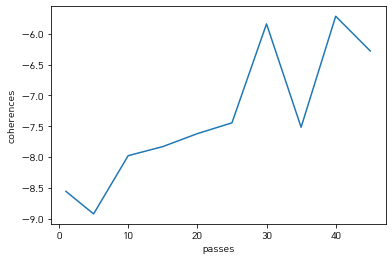

In [47]:
plt.plot(passes, coherences)
plt.xlabel('passes')
plt.ylabel('coherences')
plt.show()

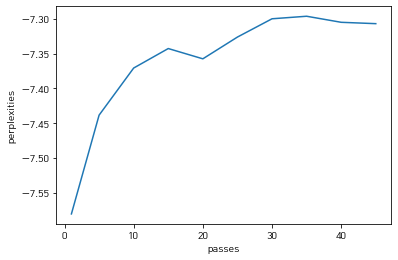

In [48]:
plt.plot(passes, perplexities)
plt.xlabel('passes')
plt.ylabel('perplexities')
plt.show()

**=> passes 값은 40으로 하기**

### topic 값 조정하기

In [49]:
from gensim import corpora, models, similarities

coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(10):
    if i==0:
        ntopics = 1
    else:
        ntopics = i+1
    nwords = 15
    tic = time.time()
    lda4 = models.ldamodel.LdaModel(noun_corpus, id2word=noun_dictionary, num_topics=ntopics, iterations=400, passes=40)
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=noun_corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Coherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(noun_corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(noun_corpus))

ntopics 1 28.140763759613037
Coherence -3.236156539013844
Perplexity:  -7.191934097278107 


ntopics 2 82.10047268867493
Coherence -4.565772461579038
Perplexity:  -7.202754318438311 


ntopics 3 79.02971696853638
Coherence -4.942688631552676
Perplexity:  -7.181338076679172 


ntopics 4 84.19490838050842
Coherence -7.592415036125743
Perplexity:  -7.235408995716305 


ntopics 5 87.45422887802124
Coherence -7.205324291462745
Perplexity:  -7.306871227739981 


ntopics 6 92.1505880355835
Coherence -7.698212760066201
Perplexity:  -7.3114200915472844 


ntopics 7 74.45889568328857
Coherence -9.109869075361305
Perplexity:  -7.379201670091511 


ntopics 8 81.39155673980713
Coherence -9.905038261625386
Perplexity:  -7.355777753208594 


ntopics 9 62.41313982009888
Coherence -10.656365345085065
Perplexity:  -7.398986765717748 


ntopics 10 72.43837022781372
Coherence -10.737457684679105
Perplexity:  -7.417744704215278 




In [50]:
ntopics = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

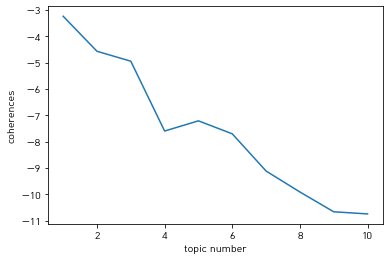

In [51]:
plt.plot(ntopics, coherencesT)
plt.xlabel('topic number')
plt.ylabel('coherences')
plt.show()

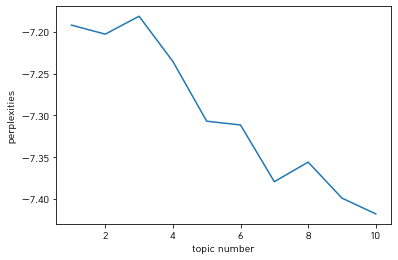

In [52]:
plt.plot(ntopics, perplexitiesT)
plt.xlabel('topic number')
plt.ylabel('perplexities')
plt.show()

In [53]:
k = 2 # 토픽의 개수 설정
noun_lda_model = gensim.models.ldamulticore.LdaMulticore(noun_corpus, iterations = 400, num_topics = k, id2word = noun_dictionary, 
                                                   passes = 40, workers = 10)

print(noun_lda_model.print_topics(num_topics = k, num_words = 15))

[(0, '0.049*"광고" + 0.031*"노래" + 0.017*"진짜" + 0.013*"까지" + 0.012*"보고" + 0.011*"빙그레우스" + 0.010*"처음" + 0.008*"어요" + 0.008*"빙그레" + 0.008*"뮤지컬" + 0.007*"다가" + 0.006*"영상" + 0.006*"생각" + 0.006*"고퀄" + 0.006*"감동"'), (1, '0.073*"빙그레" + 0.033*"우유" + 0.030*"메이커" + 0.030*"바나나" + 0.023*"업무" + 0.016*"목소리" + 0.015*"빙그레우스" + 0.012*"보고" + 0.010*"웃음" + 0.009*"보스" + 0.008*"세상" + 0.008*"정신" + 0.007*"성우" + 0.007*"투게더" + 0.007*"하하"')]


## 2) 시각화하기

In [36]:
# 한글 유니코드 인코딩 'utf-8'로 설정해둘 것
import os
os.environ["PYTHONIOENCODING"] = "utf-8"

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [37]:
pyLDAvis.enable_notebook()

verb_lda_vis = gensimvis.prepare(verb_lda_model, verb_corpus, verb_dictionary)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**verb/주제3개** => 여기선 얘!

In [38]:
pyLDAvis.display(verb_lda_vis)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**verb/주제4개** => 이것도 나쁘지 않음 고려해볼 것

In [39]:
pyLDAvis.enable_notebook()

verb_lda_vis2 = gensimvis.prepare(verb_lda_model2, verb_corpus, verb_dictionary)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
pyLDAvis.display(verb_lda_vis2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**noun/주제 2개**

In [55]:
pyLDAvis.enable_notebook()

noun_lda_vis = gensimvis.prepare(noun_lda_model, noun_corpus, noun_dictionary)

In [56]:
pyLDAvis.display(noun_lda_vis)

# 워드 네트워크 그리기 - NetworkX 패키지 사용

In [1]:
import seaborn as sns
import networkx as nx

### 명사

In [7]:
def want_noun(comment_txt):
    wordlist = []
    if len(comment_txt)>0:
        tw = okt.pos(comment_txt)
        for i,j in tw:
            if (j == 'Noun'):
                wordlist.append(i)
    return wordlist

noun_tk = []
for d in youtube_result['comment']:
    noun_tk.append(want_noun(d))
print(noun_tk)

[['빙그레나라', '빙그레', '캐롤', '날', '부터', '크리스마스', '임', '공표', '함', '빙그레우스', '맘대로', '해당', '공표', '빙그레', '캐롤', '여러분', '오늘', '부터', '크리스마스', '귀', '여운', '건', '크게', '보라', '명', '전체', '화면', '주시', '이나', '일찍', '시작', '크리스마스', '만큼', '마', '음으로', '더', '수고', '빙그레', '세상', '빙그레', '가득', '해지', '길', '바', '마음', '빙그레', '크리스마스', '캐롤', '송', '버전', '음원', '여러분', '오픈'], ['부', '벝', '닢', '브보'], [], ['뭐'], ['노', '얼굴', '유튜브', '왜', '난', '개'], ['나', '이', '광고', '처음', '볼때', '게임', '광고인', '줄'], ['대박', '귀여웡'], ['김성철', '배우', '통해', '입덕', '어요', '빙그레'], ['크리스마스', '갑자기', '생각', '습'], ['굿', '내주', '제발'], ['빙그레', '미쳤눜', '무슨', '캐롤', '곸'], ['말'], ['꽃게랑', '혼자', '눈', '모양', '다른', '것'], ['상', '산타', '선물', '자신', '엄마', '아빠', '임'], ['듣기'], ['종도', '바나나', '우유', '임'], ['빙그레', '왜', '나', '거', '광고', '안', '개', '짜증'], ['노래', '손', '소원', '발', '어요', '산타', '찿아왓저', '빙', '나라', '목', '세상', '공기', '속', '그대', '마소', '빙', '크리스마스', '종소리', '리나', '우리', '눈웃음', '부터', '한번', '어볼꺼', '빙', '크리스마스', '빙그레', '크리스마스', '빙그레', '크리스마스', '오늘', '박', '웃음', '워'], ['끌레도르', '어요'], ['바나나', '우유'

In [8]:
noun_tk2 = []
for d in noun_tk:
    item = [i for i in d if len(i)>1]
    noun_tk2.append(item)
noun_tk2[:10]

[['빙그레나라',
  '빙그레',
  '캐롤',
  '부터',
  '크리스마스',
  '공표',
  '빙그레우스',
  '맘대로',
  '해당',
  '공표',
  '빙그레',
  '캐롤',
  '여러분',
  '오늘',
  '부터',
  '크리스마스',
  '여운',
  '크게',
  '보라',
  '전체',
  '화면',
  '주시',
  '이나',
  '일찍',
  '시작',
  '크리스마스',
  '만큼',
  '음으로',
  '수고',
  '빙그레',
  '세상',
  '빙그레',
  '가득',
  '해지',
  '마음',
  '빙그레',
  '크리스마스',
  '캐롤',
  '버전',
  '음원',
  '여러분',
  '오픈'],
 ['브보'],
 [],
 [],
 ['얼굴', '유튜브'],
 ['광고', '처음', '볼때', '게임', '광고인'],
 ['대박', '귀여웡'],
 ['김성철', '배우', '통해', '입덕', '어요', '빙그레'],
 ['크리스마스', '갑자기', '생각'],
 ['내주', '제발']]

In [9]:
from apyori import apriori

In [10]:
result3 = (list(apriori(noun_tk2, min_support=0.0039)))
df3=pd.DataFrame(result3)
df3

,items,support,ordered_statistics
0,(가사),0.004818,"[((), (가사), 0.004818383988139363, 1.0)]"
1,(가슴),0.007660,"[((), (가슴), 0.0076599950580677045, 1.0)]"
2,(감동),0.022486,"[((), (감동), 0.02248579194465036, 1.0)]"
3,(감사),0.008031,"[((), (감사), 0.008030639980232271, 1.0)]"
4,(감수),0.004695,"[((), (감수), 0.004694835680751174, 1.0)]"
...,...,...,...
553,"(빙그레, 웃음, 공기, 세상, 미소)",0.004077,"[((), (빙그레, 세상, 미소, 웃음, 공기), 0.004077094143810..."
554,"(빙그레, 메이커, 웃음, 세상, 미소)",0.003954,"[((), (빙그레, 세상, 메이커, 미소, 웃음), 0.00395354583642..."
555,"(빙그레, 웃기, 메이커, 세상, 민망)",0.003954,"[((), (빙그레, 웃기, 세상, 메이커, 민망), 0.00395354583642..."
556,"(빙그레, 메이커, 웃음, 위해, 시도)",0.003954,"[((), (빙그레, 위해, 시도, 메이커, 웃음), 0.00395354583642..."


In [13]:
df3['length'] = df3['items'].apply(lambda x: len(x))
df3 = df3[(df3['length'] == 2) & (df3['support'] >= 0.005)].sort_values(by='support', ascending=False)
# df3 = df3[(df3['length'] == 2)].sort_values(by='support', ascending=False)
df3.head(50)

,items,support,ordered_statistics,length
331,"(바나나, 우유)",0.053496,"[((), (바나나, 우유), 0.053496417099085744, 1.0), (...",2
234,"(보고, 광고)",0.028045,"[((), (보고, 광고), 0.028045465777118854, 1.0), ((...",2
223,"(까지, 광고)",0.023227,"[((), (까지, 광고), 0.02322708178897949, 1.0), ((광...",2
236,"(광고, 빙그레)",0.022980,"[((), (광고, 빙그레), 0.022979985174203115, 1.0), (...",2
300,"(빙그레, 메이커)",0.022486,"[((), (빙그레, 메이커), 0.02248579194465036, 1.0), (...",2
252,"(광고, 처음)",0.022115,"[((), (광고, 처음), 0.022115147022485793, 1.0), ((...",2
352,"(업무, 보스)",0.021621,"[((), (업무, 보스), 0.021620953792933037, 1.0), ((...",2
251,"(광고, 진짜)",0.020138,"[((), (광고, 진짜), 0.02013837410427477, 1.0), ((광...",2
224,"(노래, 광고)",0.019644,"[((), (노래, 광고), 0.019644180874722018, 1.0), ((...",2
355,"(빙그레, 빙그레우스)",0.017050,"[((), (빙그레, 빙그레우스), 0.01704966641957005, 1.0),...",2


In [14]:
df3

,items,support,ordered_statistics,length
331,"(바나나, 우유)",0.053496,"[((), (바나나, 우유), 0.053496417099085744, 1.0), (...",2
234,"(보고, 광고)",0.028045,"[((), (보고, 광고), 0.028045465777118854, 1.0), ((...",2
223,"(까지, 광고)",0.023227,"[((), (까지, 광고), 0.02322708178897949, 1.0), ((광...",2
236,"(광고, 빙그레)",0.022980,"[((), (광고, 빙그레), 0.022979985174203115, 1.0), (...",2
300,"(빙그레, 메이커)",0.022486,"[((), (빙그레, 메이커), 0.02248579194465036, 1.0), (...",2
...,...,...,...,...
239,"(광고, 생각)",0.005065,"[((), (광고, 생각), 0.00506548060291574, 1.0), ((광...",2
233,"(광고, 바나나)",0.005065,"[((), (광고, 바나나), 0.00506548060291574, 1.0), ((...",2
212,"(빙그레우스, 계속)",0.005065,"[((), (계속, 빙그레우스), 0.00506548060291574, 1.0), ...",2
209,"(계속, 메이커)",0.005065,"[((), (계속, 메이커), 0.00506548060291574, 1.0), ((...",2


In [131]:
G3 = nx.Graph()
ar3 = (df3['items']); G3.add_edges_from(ar3)

In [132]:
pr3 = nx.pagerank(G3)
nsize3 = np.array([v for v in pr3.values()])
nsize3 = 2000*(nsize3-min(nsize3)) / (max(nsize3) - min(nsize3))

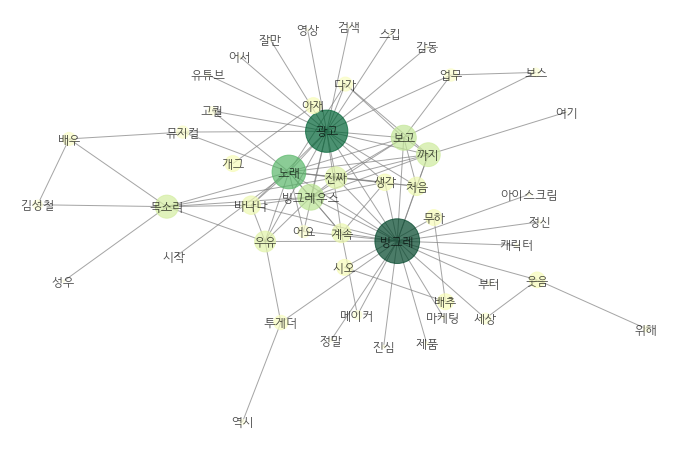

In [133]:
pos3=nx.kamada_kawai_layout(G3)
plt.figure(figsize=(12, 8)); plt.axis('off')
nx.draw_networkx(G3, font_family = font_name, font_size=12,
                pos=pos3, node_color=list(pr3.values()), node_size=nsize3,
                alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn)
plt.savefig('C:/Users/kathy/OneDrive - SNU/5-1학기/인문데이터과학연습/중간발표 이후/youtube.png',
           bbox_inches='tight')

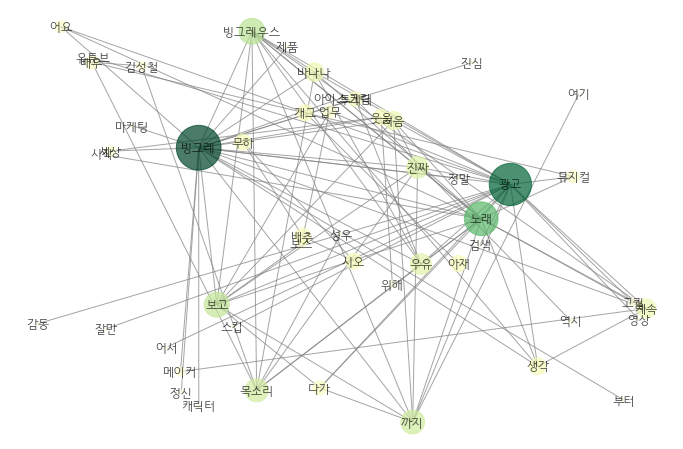

In [134]:
pos3=nx.random_layout(G3)
plt.figure(figsize=(12, 8)); plt.axis('off')
nx.draw_networkx(G3, font_family = font_name, font_size=12,
                pos=pos3, node_color=list(pr3.values()), node_size=nsize3,
                alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn)
plt.savefig('C:/Users/kathy/OneDrive - SNU/5-1학기/인문데이터과학연습/중간발표 이후/youtube2.png',
           bbox_inches='tight')